<a href="https://colab.research.google.com/github/Dhruvjain484/Machine-learning-projects-for-beginner-Part-1/blob/main/Salary%20Data/Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

##Importing the dataset

In [4]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
y = y.reshape(len(y), 1)

##Scaling the dataset


In [7]:
from sklearn.preprocessing import StandardScaler
scaled_x = StandardScaler()
scaled_y = StandardScaler()

x_scaled = scaled_x.fit_transform(x)
y_scaled = scaled_y.fit_transform(y)

##Training the Regression model on the dataset

In [8]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

# from sklearn.svm import SVR
# regressor = SVR(kernel= 'rbf')

# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()

regressor.fit(x_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Predicting the result

In [9]:
y_pred = scaled_y.inverse_transform(regressor.predict(x_scaled))
np.set_printoptions(precision = 2)
y_pred = y_pred.reshape(len(y_pred), 1)


In [10]:
np.concatenate((y, y_pred), 1)


array([[ 39343.  ,  36187.16],
       [ 46205.  ,  38077.15],
       [ 37731.  ,  39967.14],
       [ 43525.  ,  44692.12],
       [ 39891.  ,  46582.12],
       [ 56642.  ,  53197.09],
       [ 60150.  ,  54142.09],
       [ 54445.  ,  56032.08],
       [ 64445.  ,  56032.08],
       [ 57189.  ,  60757.06],
       [ 63218.  ,  62647.05],
       [ 55794.  ,  63592.05],
       [ 56957.  ,  63592.05],
       [ 57081.  ,  64537.05],
       [ 61111.  ,  68317.03],
       [ 67938.  ,  72097.02],
       [ 66029.  ,  73987.01],
       [ 83088.  ,  75877.  ],
       [ 81363.  ,  81546.98],
       [ 93940.  ,  82491.97],
       [ 91738.  ,  90051.94],
       [ 98273.  ,  92886.93],
       [101302.  , 100446.9 ],
       [113812.  , 103281.89],
       [109431.  , 108006.87],
       [105582.  , 110841.86],
       [116969.  , 115566.84],
       [112635.  , 116511.84],
       [122391.  , 123126.81],
       [121872.  , 125016.8 ]])

##Visulising the regression model

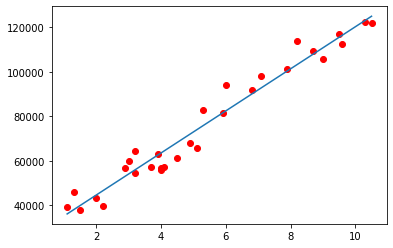

In [11]:
plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred)

##Checking the accuracy

In [12]:
from sklearn.metrics import r2_score
r2_score(y ,y_pred)

0.9569566641435086

In [15]:
#Do not rely on the accuracy everytime. In future, the size and number of features will be high in the dataset.